In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
car=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_price_dataset.csv')

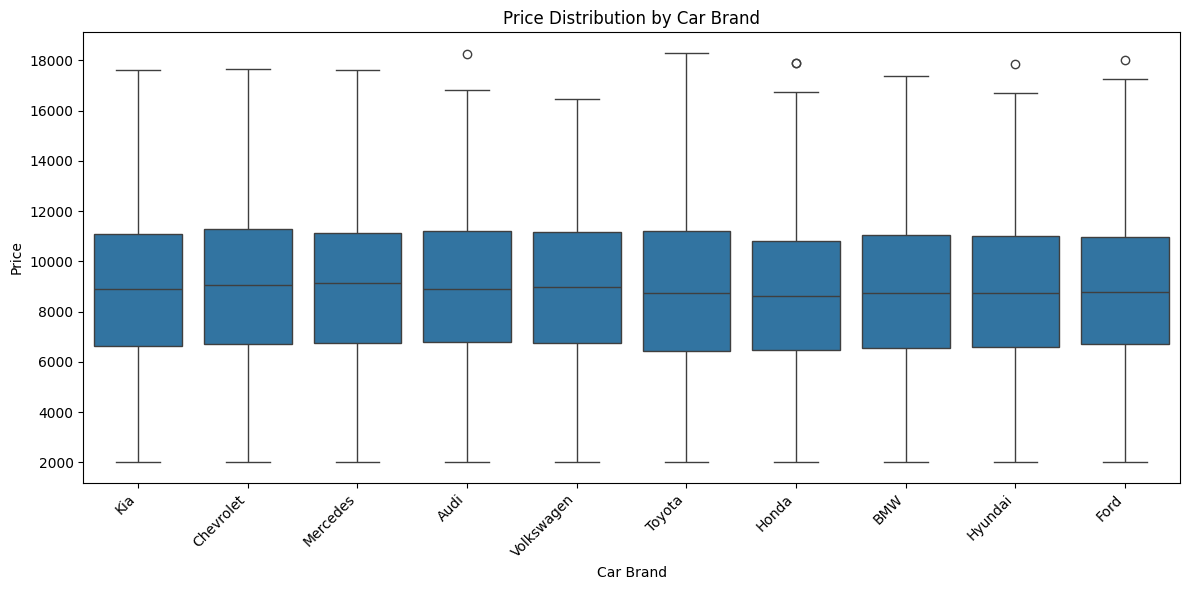

RMSE (KNN): 847.219126200536
RMSE (Linear Regression): 64.77468360271688


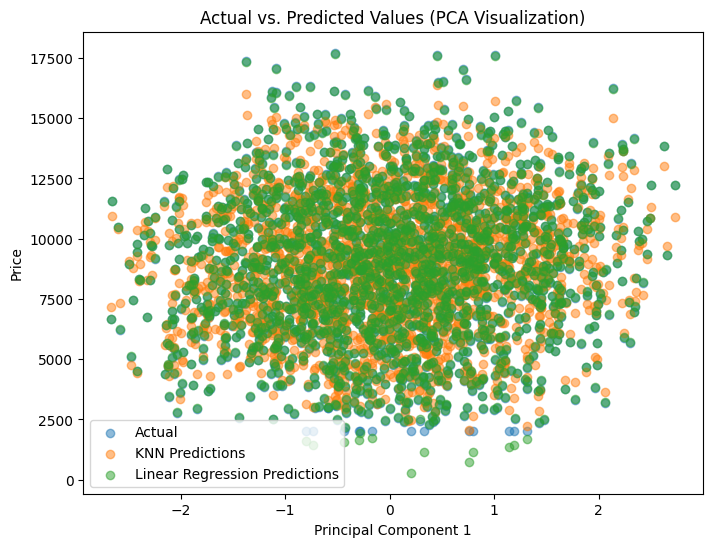

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_price_dataset.csv')

# Handle missing values
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Remove rows with any remaining missing values
df.dropna(inplace=True)

# Feature Engineering and Selection
# 1. One-Hot Encode Categorical Features
categorical_features = ['Brand', 'Fuel_Type', 'Transmission']
numerical_features = ['Year', 'Mileage', 'Engine_Size', 'Doors', 'Owner_Count']

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Fit and transform the data
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable
X_processed = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Visualization: Price distribution based on car brand (assuming 'Brand' column exists)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=df)  # Use boxplot for better visualization of distributions
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Train KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (KNN): {rmse}")

# --- Comparison with Linear Regression ---
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions using Linear Regression
y_pred_linear = linear_reg.predict(X_test)

# Evaluate Linear Regression using RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"RMSE (Linear Regression): {rmse_linear}")

#  Plotting predictions vs actual values
# Since we have many features after one-hot encoding, we'll use PCA to reduce
# the dimensions for plotting.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], y_test, label='Actual', alpha=0.5)
plt.scatter(X_test_pca[:, 0], y_pred, label='KNN Predictions', alpha=0.5)
plt.scatter(X_test_pca[:, 0], y_pred_linear, label='Linear Regression Predictions', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values (PCA Visualization)')
plt.legend()
plt.show()

In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}  # Test k values from 1 to 20
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"RMSE (KNN with best k): {rmse_best}")

Best k: 17
RMSE (KNN with best k): 701.6567941031233
